In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
FILE = 'diffs_plus.parq.gzip'

sns.set_style("darkgrid")
pd.options.display.max_columns = 100

In [3]:
data = pd.read_parquet(FILE)
data.head()

,sales,discount,age,gender,cust_state,tenure,profit,month,post_intervention,treated
0,1153.28,0,25,O,MA,19,57.66,7,True,False
1,1978.13,0,26,M,MG,16,98.91,6,True,False
2,1095.70,0,26,W,RJ,20,54.78,2,False,True
3,2404.90,25,30,W,BA,18,95.24,6,True,True
4,1704.80,0,38,M,PB,15,85.24,4,False,False


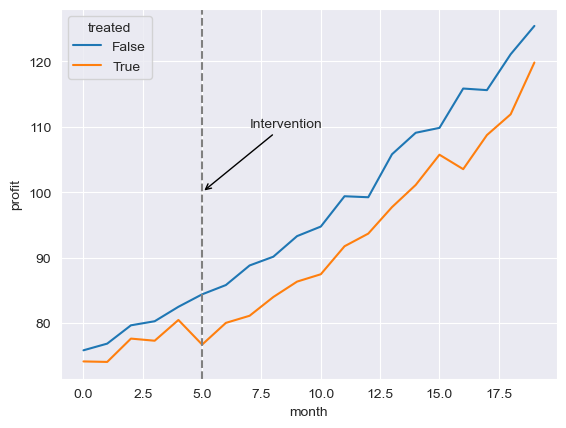

In [26]:
by_month = data.groupby(['month', 'treated'])['profit'].mean().reset_index()
sns.lineplot(x='month', y='profit', hue='treated', data=by_month)
plt.axvline(5, color='gray', linestyle='dashed')
plt.annotate(text='Intervention', xy=(5, 100), xytext=(7, 110), arrowprops={'arrowstyle': "->", 'color': 'black'})
plt.show()

In [29]:
atet = data.groupby(['post_intervention', 'treated'])['profit'].mean()
atet

post_intervention  treated
False              False      80.527533
                   True       78.176658
True               False      92.442781
                   True       85.318404
Name: profit, dtype: float64

In [39]:
growth_treated = (atet[(True, True)] - atet[(False, True)]) / atet[(False, True)]
growth_control = (atet[(True, False)] - atet[(False, False)]) / atet[(False, False)]

print(f"Growth %, Control: {growth_control.round(4)} | Growth %, Treated: {growth_treated.round(4)}")
print(f"Difference: {(growth_treated - growth_control).round(4)}")

Growth %, Control: 0.148 | Growth %, Treated: 0.0914
Difference: -0.0566


In [40]:
growth_treated = (atet[(True, True)] - atet[(False, True)])
growth_control = (atet[(True, False)] - atet[(False, False)])

print(f"Growth $, Control: {growth_control.round(4)} | Growth $, Treated: {growth_treated.round(4)}")
print(f"Difference: {(growth_treated - growth_control).round(4)}")

Growth $, Control: 11.9152 | Growth $, Treated: 7.1417
Difference: -4.7735


In [36]:
formula = 'profit ~ treated + post_intervention + treated:post_intervention'
fit = smf.ols(formula, data=data).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     511.6
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:55:21   Log-Likelihood:            -2.4221e+05
No. Observations:               50000   AIC:                         4.844e+05
Df Residuals:                   49996   BIC:                         4.845e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    80.5275      0.342    235.715      0.000      79.858      81.197
treated[T.True]                              -2.3509      0.532     -4.421      0.000      -3.393      -1.309
post_intervention[T.True]                    11.9152      0.402     29.673      0.000      11.128      12.702
treated[T.True]:post_intervention[T.True]    -4.7735      0.625     -7.642      0.000      -5.998      -3.549
==============================================================================
Omnibus:                     4792.696   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24089.614
Skew:                           0.338   Prob(JB):                         0.00
Kurtosis:                       6.332   Cond. No.                         8.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""